<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/First_Example_of_a_CNN_(CIFAR10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First example of a CNN

(C) Umberto Michelucci

umberto.michelucci@toelt.ai

www.toelt.ai

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

#from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

from tensorflow.keras.datasets import cifar10
import numpy as np
from tensorflow.keras import utils

import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.style.use('classic')

In [3]:
utils.set_random_seed(42)

## Model

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [5]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [6]:
nClasses = 10
y_train = utils.to_categorical(y_train,nClasses)
y_test = utils.to_categorical(y_test,nClasses)

In [7]:
x_train.shape[1:]

(32, 32, 3)

In [8]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [9]:
K.clear_session()
model = createModel()

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2024-01-03 18:50:54.888440: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-03 18:50:54.888671: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
AdamOpt = Adam(learning_rate=0.001)
model.compile(optimizer=AdamOpt, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [12]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 10)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


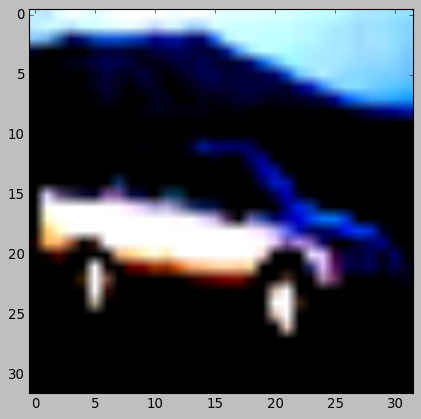

In [13]:
plt.imshow(x_train[4])

In [14]:
batch_size = 256
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(x_test, y_test))

Epoch 1/10


2024-01-03 18:51:09.509453: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-01-03 18:51:09.940719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - ETA: 0s - loss: 1.7729 - accuracy: 0.3326

2024-01-03 18:51:31.233894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - 26s 102ms/step - loss: 1.7729 - accuracy: 0.3326 - val_loss: 1.4189 - val_accuracy: 0.4806
Epoch 2/10
196/196 [==============================] - 14s 73ms/step - loss: 1.3487 - accuracy: 0.5075 - val_loss: 1.1720 - val_accuracy: 0.5783
Epoch 3/10
196/196 [==============================] - 14s 73ms/step - loss: 1.1720 - accuracy: 0.5781 - val_loss: 1.0555 - val_accuracy: 0.6258
Epoch 4/10
196/196 [==============================] - 14s 73ms/step - loss: 1.0372 - accuracy: 0.6296 - val_loss: 0.9390 - val_accuracy: 0.6737
Epoch 5/10
196/196 [==============================] - 14s 73ms/step - loss: 0.9365 - accuracy: 0.6710 - val_loss: 0.8541 - val_accuracy: 0.7006
Epoch 6/10
196/196 [==============================] - 14s 73ms/step - loss: 0.8671 - accuracy: 0.6968 - val_loss: 0.8289 - val_accuracy: 0.7085
Epoch 7/10
196/196 [==============================] - 14s 74ms/step - loss: 0.8052 - accuracy: 0.7165 - val_loss: 0.7414 - val_accuracy: 0.7377
Ep

In [15]:
history.history

{'loss': [1.7729254961013794,
  1.3487398624420166,
  1.1719874143600464,
  1.037213683128357,
  0.9365288019180298,
  0.8671274185180664,
  0.8051745891571045,
  0.7601478099822998,
  0.7283555269241333,
  0.6918054819107056],
 'accuracy': [0.3326199948787689,
  0.5075200200080872,
  0.57805997133255,
  0.6295999884605408,
  0.671019971370697,
  0.6967800259590149,
  0.716480016708374,
  0.732420027256012,
  0.7448800206184387,
  0.7558599710464478],
 'val_loss': [1.4189426898956299,
  1.1719913482666016,
  1.0555258989334106,
  0.9390445351600647,
  0.8540804982185364,
  0.8289039134979248,
  0.7413698434829712,
  0.7044124007225037,
  0.7165949940681458,
  0.6650042533874512],
 'val_accuracy': [0.4805999994277954,
  0.5782999992370605,
  0.6258000135421753,
  0.6736999750137329,
  0.7006000280380249,
  0.7085000276565552,
  0.7376999855041504,
  0.7572000026702881,
  0.7548999786376953,
  0.766700029373169]}

Text(0, 0.5, 'Loss')

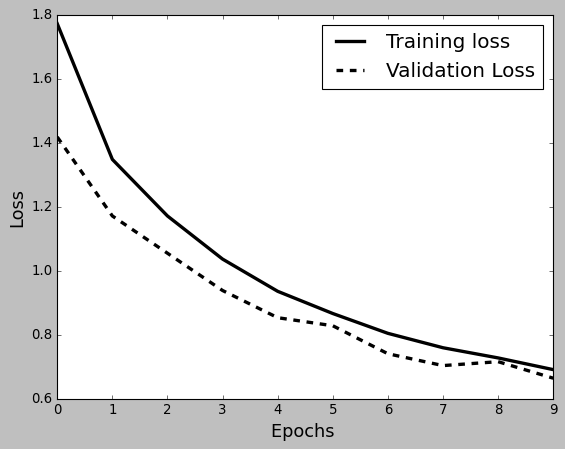

In [16]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)


Text(0, 0.5, 'Accuracy')

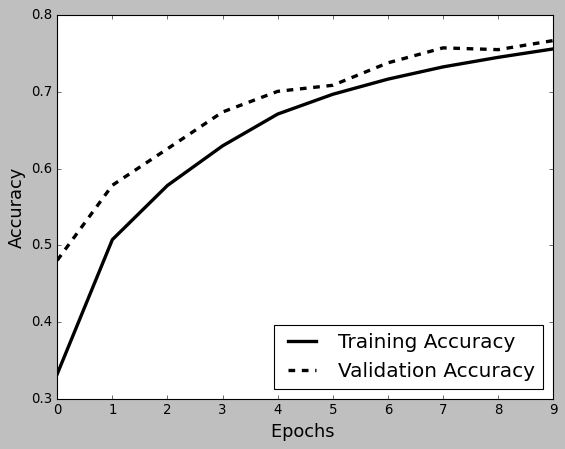

In [17]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'black',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)
